# PROJECT IDEA

This project aims to use AI to identify different food types.
It is based on a Kaggle dataset (https://www.kaggle.com/datasets/kmader/food41).
In the Kaggle's project, the goal is to classify in several categories, but here I aim to narrow it down to only four
1. Soup
2. Salad
3. Pasta
4. Sandwich

The classification of the foods is based on the experience about it and in my discussion with friends. During several meetings we classified some of these foods in these 4 types.

"""python3 -m pip install + package"""

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

In [3]:
image_dir = Path('input/archive/images')

In [4]:


filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)



In [5]:
category_samples = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_samples.append(category_slice.sample(100, random_state=1))
image_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
image_df.head()

,Filepath,Label
0,input/archive/images/grilled_salmon/1900398.jpg,grilled_salmon
1,input/archive/images/caprese_salad/3901537.jpg,caprese_salad
2,input/archive/images/baklava/3909284.jpg,baklava
3,input/archive/images/omelette/226902.jpg,omelette
4,input/archive/images/lasagna/2547674.jpg,lasagna


### Getting all unique labels from the original database

In [6]:
image_df["Label"].unique()

array(['grilled_salmon', 'caprese_salad', 'baklava', 'omelette',
       'lasagna', 'ramen', 'chicken_quesadilla', 'pad_thai',
       'filet_mignon', 'macarons', 'onion_rings', 'creme_brulee',
       'fried_rice', 'spaghetti_carbonara', 'seaweed_salad',
       'spaghetti_bolognese', 'pork_chop', 'eggs_benedict', 'hamburger',
       'escargots', 'bruschetta', 'strawberry_shortcake', 'poutine',
       'tuna_tartare', 'cheesecake', 'ceviche', 'miso_soup',
       'croque_madame', 'panna_cotta', 'cup_cakes', 'french_toast',
       'gnocchi', 'nachos', 'french_onion_soup', 'fried_calamari',
       'hot_and_sour_soup', 'club_sandwich', 'ice_cream', 'garlic_bread',
       'cannoli', 'beef_carpaccio', 'risotto', 'caesar_salad',
       'lobster_roll_sandwich', 'macaroni_and_cheese', 'beef_tartare',
       'edamame', 'steak', 'clam_chowder', 'beignets', 'red_velvet_cake',
       'carrot_cake', 'peking_duck', 'french_fries', 'fish_and_chips',
       'chocolate_cake', 'cheese_plate', 'shrimp_and_gri

### Creating the new category based on our 4 food classification

In [7]:
dic_food_types = {
    'grilled_salmon' : 'pasta',
    'caprese_salad' : 'salad', 
    'baklava' : 'sandwich', 
    'omelette' : 'salad',
    'lasagna' : 'sandwich', 
    'ramen' : 'soup', 
    'chicken_quesadilla' : 'sandwich', 
    'pad_thai' : 'salad',
    'filet_mignon' : 'pasta', 
    'macarons' : 'sandwich', 
    'onion_rings' : 'salad', 
    'creme_brulee' : 'salad',
    'fried_rice' : 'salad', 
    'spaghetti_carbonara' : 'pasta', 
    'seaweed_salad' : 'salad',
    'spaghetti_bolognese' : 'pasta', 
    'pork_chop' : 'salad', 
    'eggs_benedict' : 'salad', 
    'hamburger' : 'sandwich',
    'escargots' : 'salad', 
    'bruschetta' : 'sandwich', 
    'strawberry_shortcake' : 'sandwich', 
    'poutine' : 'salad',
    'tuna_tartare' : 'salad', 
    'cheesecake' : 'sandwich', 
    'ceviche' : 'salad', 
    'miso_soup' : 'soup',
    'croque_madame' : 'sandwich', 
    'panna_cotta' : 'salad', 
    'cup_cakes' : 'salad', 
    'french_toast' : 'sandwich',
    'gnocchi' : 'pasta', 
    'nachos' : 'salad', 
    'french_onion_soup' : 'soup', 
    'fried_calamari' : 'salad',
    'hot_and_sour_soup' : 'soup', 
    'club_sandwich' : 'sandwich', 
    'ice_cream' : 'soup', 
    'garlic_bread' : 'sandwich',
    'cannoli' : 'sandwich', 
    'beef_carpaccio' : 'salad', 
    'risotto' : 'salad', 
    'caesar_salad' : 'salad',
    'lobster_roll_sandwich' : 'sandwich', 
    'macaroni_and_cheese' : 'pasta', 
    'beef_tartare' : 'salad',
    'edamame' : 'salad', 
    'steak' : 'pasta', 
    'clam_chowder' : 'salad', 
    'beignets' : 'salad', 
    'red_velvet_cake' : 'sandwich',
    'carrot_cake' : 'sandwich', 
    'peking_duck' : 'salad', 
    'french_fries' : 'salad', 
    'fish_and_chips' : 'salad',
    'chocolate_cake' : 'sandwich', 
    'cheese_plate' : 'salad', 
    'shrimp_and_grits' : 'salad',
    'bread_pudding' : 'salad', 
    'dumplings' : 'salad', 
    'tacos' : 'sandwich', 
    'prime_rib': 'pasta', 
    'hummus' : 'salad',
    'baby_back_ribs' : 'pasta', 
    'hot_dog' : 'sandwich', 
    'churros' : 'salad', 
    'takoyaki' : 'salad', 
    'paella' : 'salad',
    'tiramisu' : 'sandwich', 
    'sushi' : 'sandwich', 
    'sashimi' : 'salad', 
    'beet_salad' : 'salad', 
    'lobster_bisque' : 'salad',
    'samosa' : 'salad', 
    'waffles' : 'sandwich', 
    'pulled_pork_sandwich' : 'sandwich', 
    'crab_cakes' : 'sandwich', 
    'gyoza' : 'pasta',
    'chicken_wings' : 'salad', 
    'scallops' : 'salad', 
    'oysters' : 'sandwich', 
    'pho' : 'salad', 
    'breakfast_burrito' : 'sandwich',
    'deviled_eggs' : 'salad', 
    'donuts' : 'sandwich', 
    'falafel' : 'sandwich', 
    'bibimbap' : 'salad', 
    'guacamole' : 'salad',
    'foie_gras' : 'salad', 
    'greek_salad' : 'salad', 
    'chicken_curry' : 'salad', 
    'chocolate_mousse' : 'salad',
    'apple_pie' : 'sandwich', 
    'grilled_cheese_sandwich' : 'sandwich', 
    'spring_rolls' : 'sandwich', 
    'pizza' : 'sandwich',
    'huevos_rancheros' : 'salad', 
    'ravioli' : 'pasta', 
    'mussels' : 'sandwich', 
    'pancakes' : 'sandwich',
    'frozen_yogurt' : 'soup'
}



In [8]:
image_df['Label'] = [dic_food_types[x] for x in image_df['Label']]

In [9]:
image_df['Label'].value_counts()

salad       5000
sandwich    3400
pasta       1100
soup         600
Name: Label, dtype: int64

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

### Spliting the data in train-test (80-20)

 After the training set will be splited in training and validation

In [14]:
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [15]:
# apply some preprocessing before pass the images in the model

train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [44]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    classes=['salad','soup','pasta','sandwich'],
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    classes=['salad','soup','pasta','sandwich'],
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    classes=['salad','soup','pasta','sandwich'],
    batch_size=32,
    shuffle=False
)

Found 6464 validated image filenames belonging to 4 classes.
Found 1616 validated image filenames belonging to 4 classes.
Found 2020 validated image filenames belonging to 4 classes.


### Creating a model

In [45]:
imgs, labels = next(train_images)

In [53]:
def show_image(image_array):
    """
    This function shows the images in the form of a grid
    """

    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()

    for img, ax in zip(image_array, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

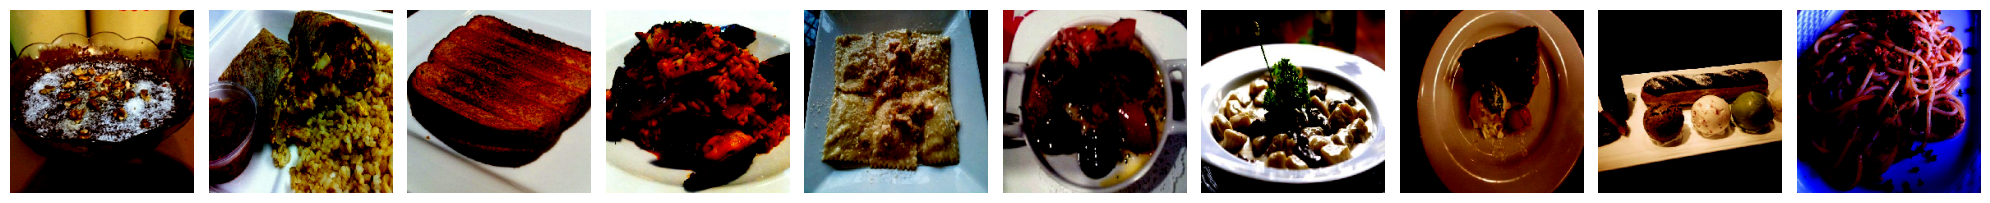

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [55]:
show_image(imgs[:10])
print(labels[:10])